## Experiments template for different types of networks, 1 sample from each type of network, multiple runs per sample

In [1]:
import os


dir = "networks"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

### Generate networks

First fixed Powerlaw networks with m = 1, and p = 0.2.\
Variable number of nodes.

In [2]:
m = 1
p = 0.2

In [3]:
dir = f"networks/powerlaw_m={m}_p={p}"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

In [4]:
import numpy as np


MIN_NODES = 10
MAX_NODES = 100

num_nodes = np.linspace(MIN_NODES, MAX_NODES, MAX_NODES//MIN_NODES)
num_nodes

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [5]:
import numpy as np
import networkx as nx


try:
    Graphs = np.load(f"{dir}/graphs.npy", allow_pickle=True)
except:
    Graphs = np.empty(shape=(len(num_nodes),), dtype=object)
    for i, n in enumerate(num_nodes):
        Graphs[i] = nx.powerlaw_cluster_graph(n=n, m=m, p=p)
    np.save(f"{dir}/graphs.npy", Graphs)

In [6]:
# output folder
dir =dir+"/output"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

#### Hierarchical approach with Gurobi first

In [9]:
solver = "gurobi"
make_dir(f"{dir}/{solver}")

In [10]:
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.searchers.hierarchical_community_searcher.hierarchical_community_searcher import HierarchicalCommunitySearcher

In [11]:
from tqdm import tqdm


N_RUNS = 100


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):    
    for r in range(N_RUNS):
        # new instance of the sampler each time
        gurobi = GurobiSampler(G, supress_output=True)
        hierch_searcher = HierarchicalCommunitySearcher(gurobi)
        comms_res = hierch_searcher.hierarchical_community_search()
        
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

0it [00:00, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-27


10it [05:32, 33.28s/it]


#### Now Advantage

In [7]:
solver = "adv"
make_dir(f"{dir}/{solver}")

In [8]:
from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_community_searcher.hierarchical_community_searcher import HierarchicalCommunitySearcher

In [10]:
from tqdm import tqdm


N_RUNS = 50


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):    
    for r in range(N_RUNS):
        # new instance of the sampler each time
        advantage = AdvantageSampler(G, num_reads=100)
        hierch_searcher = HierarchicalCommunitySearcher(advantage)
        comms_res = hierch_searcher.hierarchical_community_search()
        
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

0it [00:00, ?it/s]

3it [2:52:26, 3901.90s/it]

Something stopped after 3 its, I don't know my laptop went to sleep or something...\
So I reran it for the rest of the rest of the graphs:

In [18]:
from tqdm import tqdm


N_RUNS = 50


mods = np.zeros((num_nodes[3:].shape[0], N_RUNS))
comms = np.empty((num_nodes[3:].shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs[3:])):    
    for r in range(N_RUNS):
        # new instance of the sampler each time
        advantage = AdvantageSampler(G, num_reads=100)
        hierch_searcher = HierarchicalCommunitySearcher(advantage)
        comms_res = hierch_searcher.hierarchical_community_search()
        
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    # current_net_size = int(num_nodes[i])
    current_net_size = int(G.number_of_nodes())
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

0it [00:00, ?it/s]

3it [7:13:56, 10160.43s/it]

### Now Leiden

In [12]:
solver = "leiden"
make_dir(f"{dir}/{solver}")

In [13]:
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.searchers.community_searcher.community_searcher import CommunitySearcher

In [14]:
from tqdm import tqdm


N_RUNS = 100


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):
    leiden = LeidenSampler(G)
    searcher = CommunitySearcher(leiden)
    
    for r in range(N_RUNS):
        comms_res = searcher.community_search()
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

10it [00:00, 15.00it/s]


#### Louvain

In [15]:
solver = "louvain"
make_dir(f"{dir}/{solver}")

In [16]:
from Qommunity.samplers.regular.louvain_sampler import LouvainSampler
from Qommunity.searchers.community_searcher import CommunitySearcher

In [17]:
from tqdm import tqdm


N_RUNS = 100


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):
    louvain = LouvainSampler(G)
    searcher = CommunitySearcher(louvain)
    
    for r in range(N_RUNS):
        comms_res = searcher.community_search()
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

10it [00:02,  4.91it/s]


### Let's plot the modularity results

In [7]:
mods_gurobi = np.load(f"{dir}/gurobi/gurobi-mods_final.npy")
mods_leiden = np.load(f"{dir}/leiden/leiden-mods_final.npy")
mods_louvain = np.load(f"{dir}/louvain/louvain-mods_final.npy")
# mods_adv = np.load(f"{dir}/adv/adv-mods_final.npy")

In [8]:
mods_adv = np.array([np.load(f"{dir}/adv/adv-network_size_{n}.npy") for n in range(10, 70, 10)])
mods_adv

array([[0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605,
        0.38271605, 0.38271605, 0.38271605, 0.38271605, 0.38271605],
       [0.55124654, 0.55124654, 0.55124654, 0.55124654, 0.55124654,
        0.55124654, 0.55124654, 0.55124654, 0.55124654, 0.55124654,
        0.55124654, 0.55124654, 0.55124654, 0.55124654, 0.55124654,
        0.55124654, 0.55124654, 0.55124654, 0.55124654, 0.55124654,
        0.55124654, 0.55124654, 0.55124654, 0.5

In [9]:
print("\tadv\tlei\tgur\tlou")
digits = 8
for madv, mlei, mgur, mlou in zip(mods_adv.max(axis=-1), mods_leiden.max(axis=-1), mods_gurobi.max(axis=-1), mods_louvain.max(axis=-1)):
    madv = round(madv, digits)
    mlei = round(mlei, digits)
    mgur = round(mgur, digits)
    mlou = round(mlou, digits)
    print(madv, mlei, mgur, mlou, "\t\t", madv == mlei == mgur == mlou)
    print()


	adv	lei	gur	lou
0.38271605 0.38271605 0.38271605 0.38271605 		 True

0.55124654 0.55124654 0.55124654 0.55124654 		 True

0.58858502 0.58858502 0.58858502 0.58858502 		 True

0.67784352 0.67784352 0.67784352 0.67784352 		 True

0.65368596 0.65368596 0.65368596 0.65368596 		 True

0.70051709 0.70051709 0.69750072 0.70051709 		 False



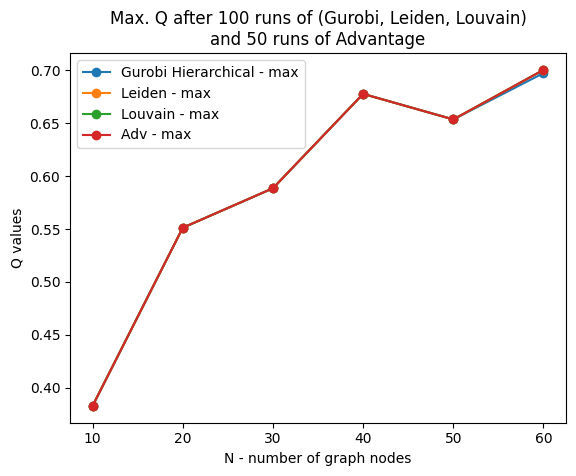

In [12]:
from matplotlib import pyplot as plt


num_nodes_up_to_60 = num_nodes[:6]


fig, ax = plt.subplots(1)
plt.plot(num_nodes_up_to_60, mods_gurobi.max(axis=-1)[:6], '-o', label="Gurobi Hierarchical - max")
plt.plot(num_nodes_up_to_60, mods_leiden.max(axis=-1)[:6], '-o', label="Leiden - max")
plt.plot(num_nodes_up_to_60, mods_louvain.max(axis=-1)[:6], '-o', label="Louvain - max")
plt.plot(num_nodes_up_to_60, mods_adv.max(axis=-1), '-o', label="Adv - max")
plt.legend()
# ax.set_title(f"Max. Q and mean Q after {N_RUNS} runs");
ax.set_title("Max. Q after 100 runs of (Gurobi, Leiden, Louvain)\nand 50 runs of Advantage");
ax.set_xlabel("N - number of graph nodes");
ax.set_ylabel("Q values");

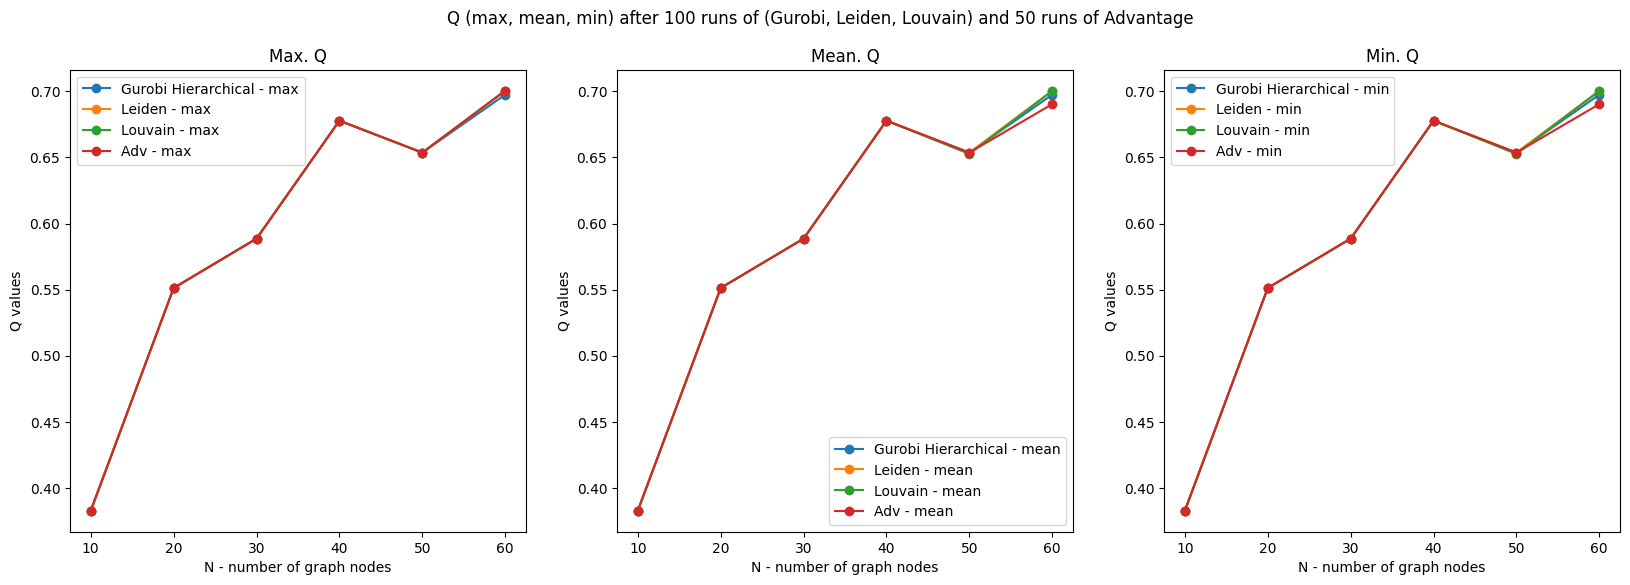

In [50]:
from matplotlib import pyplot as plt


num_nodes_up_to_60 = num_nodes[:6]


f, ax = plt.subplots(1, 3, figsize=(20, 6))
f.suptitle("Q (max, mean, min) after 100 runs of (Gurobi, Leiden, Louvain) and 50 runs of Advantage")

# Max
ax[0].plot(num_nodes_up_to_60, mods_gurobi.max(axis=-1)[:6], '-o', label="Gurobi Hierarchical - max")
ax[0].plot(num_nodes_up_to_60, mods_leiden.max(axis=-1)[:6], '-o', label="Leiden - max")
ax[0].plot(num_nodes_up_to_60, mods_louvain.max(axis=-1)[:6], '-o', label="Louvain - max")
ax[0].plot(num_nodes_up_to_60, mods_adv.max(axis=-1), '-o', label="Adv - max")
ax[0].legend()

ax[0].set_title("Max. Q");
ax[0].set_xlabel("N - number of graph nodes");
ax[0].set_ylabel("Q values");

# Mean
ax[1].plot(num_nodes_up_to_60, mods_gurobi.mean(axis=-1)[:6], '-o', label="Gurobi Hierarchical - mean")
ax[1].plot(num_nodes_up_to_60, mods_leiden.mean(axis=-1)[:6], '-o', label="Leiden - mean")
ax[1].plot(num_nodes_up_to_60, mods_louvain.mean(axis=-1)[:6], '-o', label="Louvain - mean")
ax[1].plot(num_nodes_up_to_60, mods_adv.mean(axis=-1), '-o', label="Adv - mean")
ax[1].legend()

ax[1].set_title("Mean. Q");
ax[1].set_xlabel("N - number of graph nodes");
ax[1].set_ylabel("Q values");

# Min
ax[2].plot(num_nodes_up_to_60, mods_gurobi.mean(axis=-1)[:6], '-o', label="Gurobi Hierarchical - min")
ax[2].plot(num_nodes_up_to_60, mods_leiden.mean(axis=-1)[:6], '-o', label="Leiden - min")
ax[2].plot(num_nodes_up_to_60, mods_louvain.mean(axis=-1)[:6], '-o', label="Louvain - min")
ax[2].plot(num_nodes_up_to_60, mods_adv.mean(axis=-1), '-o', label="Adv - min")
ax[2].legend()

ax[2].set_title("Min. Q");
ax[2].set_xlabel("N - number of graph nodes");
ax[2].set_ylabel("Q values");

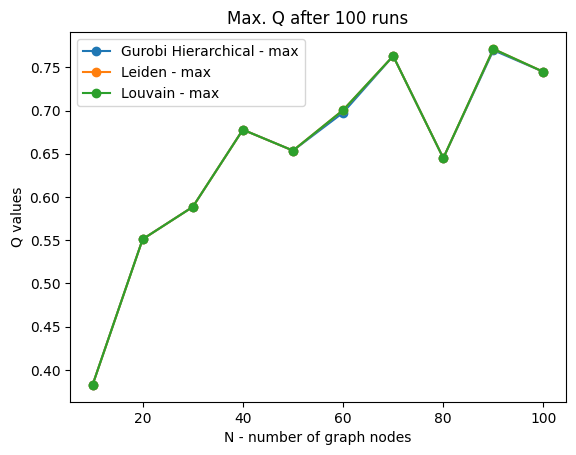

In [17]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1)
plt.plot(num_nodes, mods_gurobi.max(axis=-1), '-o', label="Gurobi Hierarchical - max")
plt.plot(num_nodes, mods_leiden.max(axis=-1), '-o', label="Leiden - max")
plt.plot(num_nodes, mods_louvain.max(axis=-1), '-o', label="Louvain - max")
plt.legend()
# ax.set_title(f"Max. Q and mean Q after {N_RUNS} runs");
ax.set_title("Max. Q after 100 runs");
ax.set_xlabel("N - number of graph nodes");
ax.set_ylabel("Q values");